In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
print("Setup done...")

Setup done...


In [2]:
df=pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
print(df.head())
print(" ")
print(df.tail())

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
 
                City        Date  PM2.5   PM10    NO    NO2    NOx    NH3  \
29526  Visakhapatnam  2020-06-27  15.02  50.94  7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28 

In [4]:
print("Getting information about the respective columns in the dataset...")
print(" ")
df.info()

Getting information about the respective columns in the dataset...
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
print("Filling in the missing data...")
print(" ")
cols=df.columns
cols

Filling in the missing data...
 


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [6]:
cols_to_fill = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene','AQI']
for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].median())
df['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [7]:
print("Succesfully removed null values...")
print(" ")
df.info()

Succesfully removed null values...
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
print("Arranging the cities in increasing order of air quality index...")
print(" ")

citywiseAQI = df[['City','AQI']].groupby(['City']).median().sort_values(['AQI']).reset_index()
citywiseAQI

Arranging the cities in increasing order of air quality index...
 


,City,AQI
0,Aizawl,24.0
1,Thiruvananthapuram,69.0
2,Shillong,69.5
3,Coimbatore,77.5
4,Chandigarh,83.0
5,Amaravati,86.0
6,Bengaluru,88.0
7,Ernakulam,95.5
8,Kochi,100.0
9,Guwahati,100.0


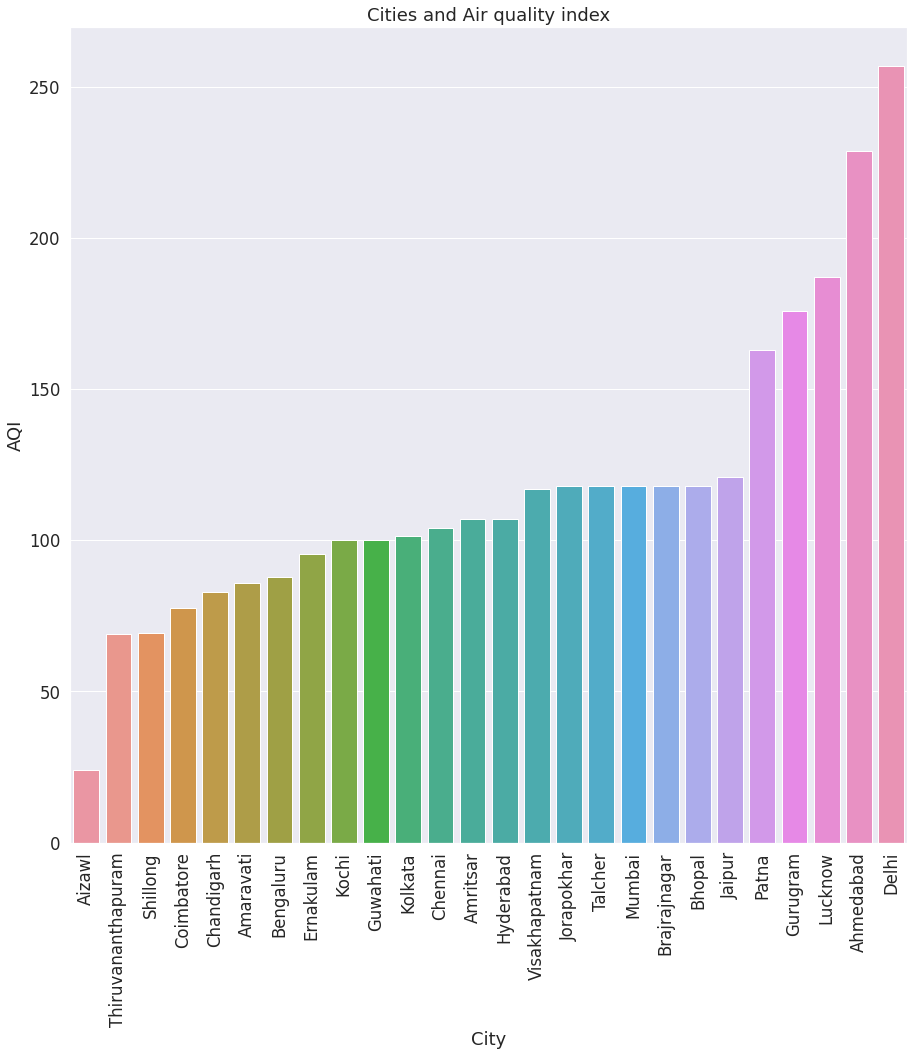

In [9]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=citywiseAQI).set(title ='Cities and Air quality index')
plt.xticks(rotation=90)
plt.show()

In [10]:
print("From the graphreading, we predict that cities like Aizwal, Thiruvananthapuram, Shillong are less polluted whereas all the major metroploitan cities are highly polluted.")

From the graphreading, we predict that cities like Aizwal, Thiruvananthapuram, Shillong are less polluted whereas all the major metroploitan cities are highly polluted.


In [11]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] =df['Date'].dt.month
df.drop('Date',axis=1,inplace=True)
df['year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020])

Now we plot yearwise AQI of the cities
 


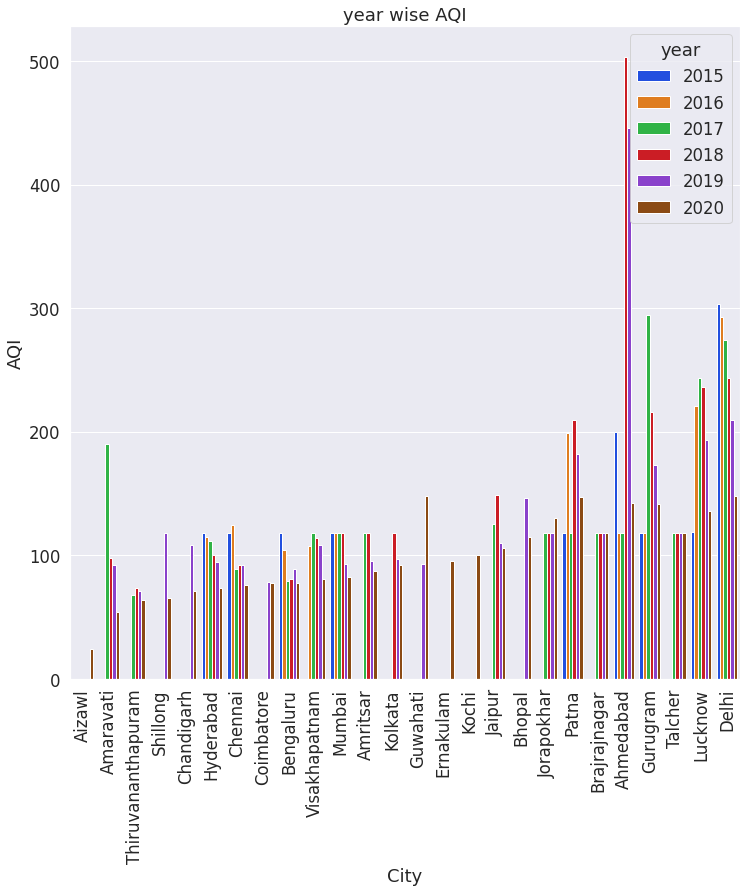

In [12]:
print("Now we plot yearwise AQI of the cities")
print(" ")
x1 = df[['City','AQI','year']].groupby(['City','year']).median().sort_values(['AQI']).reset_index()
plt.figure(figsize=(12,12))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=x1,hue='year',palette='bright').set(title ='year wise AQI')
plt.xticks(rotation=90)
plt.show()

In [13]:
print("From the graph, it is clear that Ahmedabad has the worst AQI consistently than other cities. This might be attributed to the factor that many major manufacturing industries are located there.")

From the graph, it is clear that Ahmedabad has the worst AQI consistently than other cities. This might be attributed to the factor that many major manufacturing industries are located there.


In [14]:
df[df['City']=='Ahmedabad'].sort_values('AQI',ascending=False).head()[['City','AQI']]

,City,AQI
1145,Ahmedabad,2049.0
1136,Ahmedabad,1917.0
560,Ahmedabad,1842.0
1048,Ahmedabad,1747.0
1463,Ahmedabad,1719.0


Monthly pollution chart
 


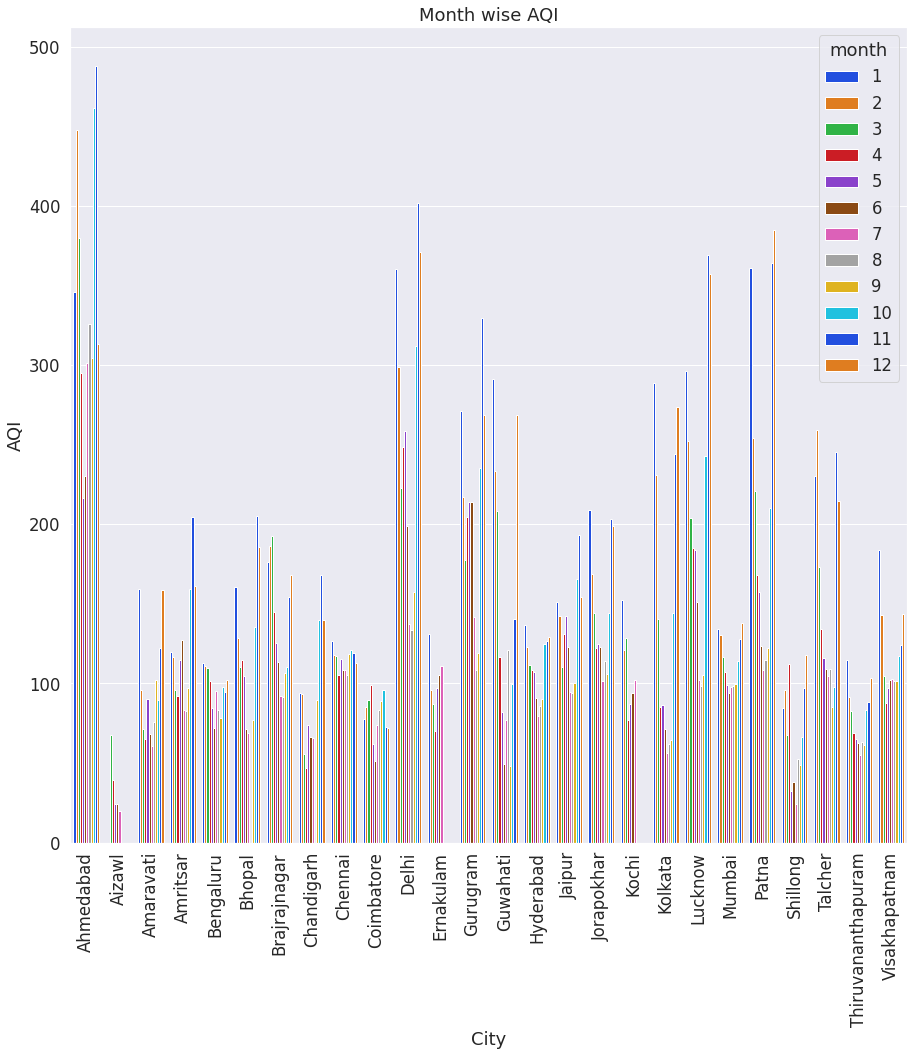

In [15]:
month_wise = df.groupby(['City','month']).agg(
    
    AQI = pd.NamedAgg(column = 'AQI',aggfunc = np.mean))
month_wise.reset_index(inplace = True)
print("Monthly pollution chart")
print(" ")
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=month_wise,hue='month',palette = 'bright').set(title ='Month wise AQI')
plt.xticks(rotation=90)
plt.show()

In [16]:
print("FRom the graph we conclude that pollution rises in the winter months. Air pollution is worse in the winter because colder and drier air traps more pollution.")

FRom the graph we conclude that pollution rises in the winter months. Air pollution is worse in the winter because colder and drier air traps more pollution.


In [17]:
df1=pd.read_csv("Indian Cities Database.csv")
df1

,City,Lat,Long,country,iso2,State
0,Abohar,30.144533,74.195520,India,IN,Punjab
1,Adilabad,19.400000,78.310000,India,IN,Telangana
2,Agartala,23.836049,91.279386,India,IN,Tripura
3,Agra,27.187935,78.003944,India,IN,Uttar Pradesh
4,Ahmadnagar,19.094571,74.738432,India,IN,Maharashtra
...,...,...,...,...,...,...
208,Vizianagaram,18.113290,83.397743,India,IN,Andhra Pradesh
209,Warangal,17.978423,79.600209,India,IN,Telangana
210,Jorapokhar,23.700000,86.412670,India,IN,Jharkhand
211,Brajrajnagar,21.820000,83.920000,India,IN,Odisha


In [18]:
df_new = pd.merge(df, df1, how = 'left', left_on = 'City',right_on = 'City')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29531 entries, 0 to 29530
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM2.5       29531 non-null  float64
 2   PM10        29531 non-null  float64
 3   NO          29531 non-null  float64
 4   NO2         29531 non-null  float64
 5   NOx         29531 non-null  float64
 6   NH3         29531 non-null  float64
 7   CO          29531 non-null  float64
 8   SO2         29531 non-null  float64
 9   O3          29531 non-null  float64
 10  Benzene     29531 non-null  float64
 11  Toluene     29531 non-null  float64
 12  Xylene      29531 non-null  float64
 13  AQI         29531 non-null  float64
 14  AQI_Bucket  24850 non-null  object 
 15  year        29531 non-null  int64  
 16  month       29531 non-null  int64  
 17  Lat         26077 non-null  float64
 18  Long        26077 non-null  float64
 19  country     26077 non-nul

In [19]:
geo_data = df_new.groupby('City').agg(
air_quality = pd.NamedAgg('AQI_Bucket',pd.Series.mode),
aqi = pd.NamedAgg('AQI',np.mean),
lat = pd.NamedAgg('Lat',max),
lng = pd.NamedAgg('Long',max)
).reset_index()
geo_data.head()

,City,air_quality,aqi,lat,lng
0,Ahmedabad,Severe,339.861623,23.025793,72.587265
1,Aizawl,Good,36.238938,NaN,NaN
2,Amaravati,Satisfactory,97.925342,20.933272,77.751520
3,Amritsar,Satisfactory,119.771499,31.622337,74.875335
4,Bengaluru,Satisfactory,95.485316,12.977063,77.587106


In [20]:
!pip install geopandas
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 48.7 MB/s eta 0:00:00


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Representing the graphical data in Indian Map...
 


<ipython-input-21-3aa5b51e7845>:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True,alpha=0.5)


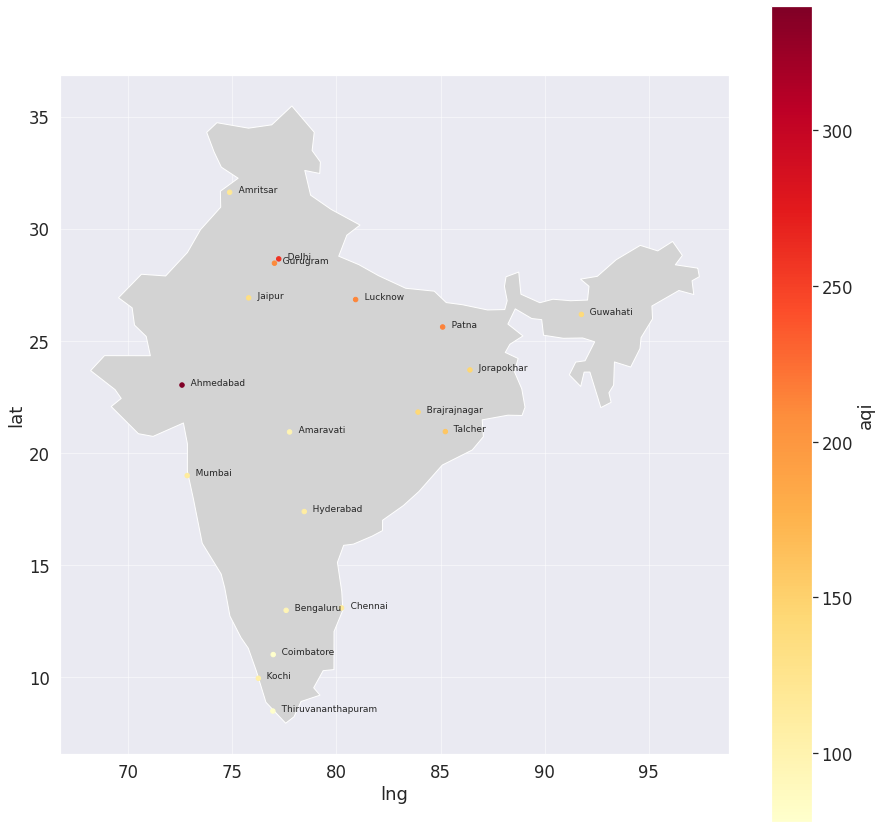

In [21]:
print("Representing the graphical data in Indian Map...")
print(" ")
fig,ax = plt.subplots(figsize = (15,15))
countries[countries['name']=='India'].plot(color='lightgrey',ax=ax)
geo_data.plot(x='lng',y='lat',kind = 'scatter',c='aqi',colormap = 'YlOrRd',ax=ax)

for idx, row in geo_data.iterrows():
    ax.annotate(str('   '+row['City']), (row['lng'], row['lat']),size=9 )
ax.grid(visible=True,alpha=0.5)
plt.show()